In [ ]:
import pandas as pd

df = pd.read_csv('fordhaftalık.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

FileNotFoundError: ignored

In [ ]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,51.500000,51.500000,47.040001,50.299999,38.660656,2476464
2019-01-08,50.299999,56.900002,49.020000,55.750000,42.849533,2587938
2019-01-15,55.750000,57.650002,54.400002,56.599998,43.502842,2167063
2019-01-22,56.099998,60.500000,55.849998,59.849998,46.000797,2054831
2019-01-29,59.750000,62.950001,56.200001,56.900002,43.733425,2008934


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-29,448.200012,453.700012,424.899994,426.100006,410.881104,14714847
2022-12-06,426.299988,442.200012,408.500000,440.500000,430.293304,13844129
2022-12-13,441.899994,470.000000,416.799988,469.899994,459.012085,14232190
2022-12-20,470.000000,496.000000,463.299988,493.700012,482.260620,13997430
2022-12-27,494.000000,532.200012,479.600006,524.500000,512.346985,13638477


<function matplotlib.pyplot.show(close=None, block=None)>

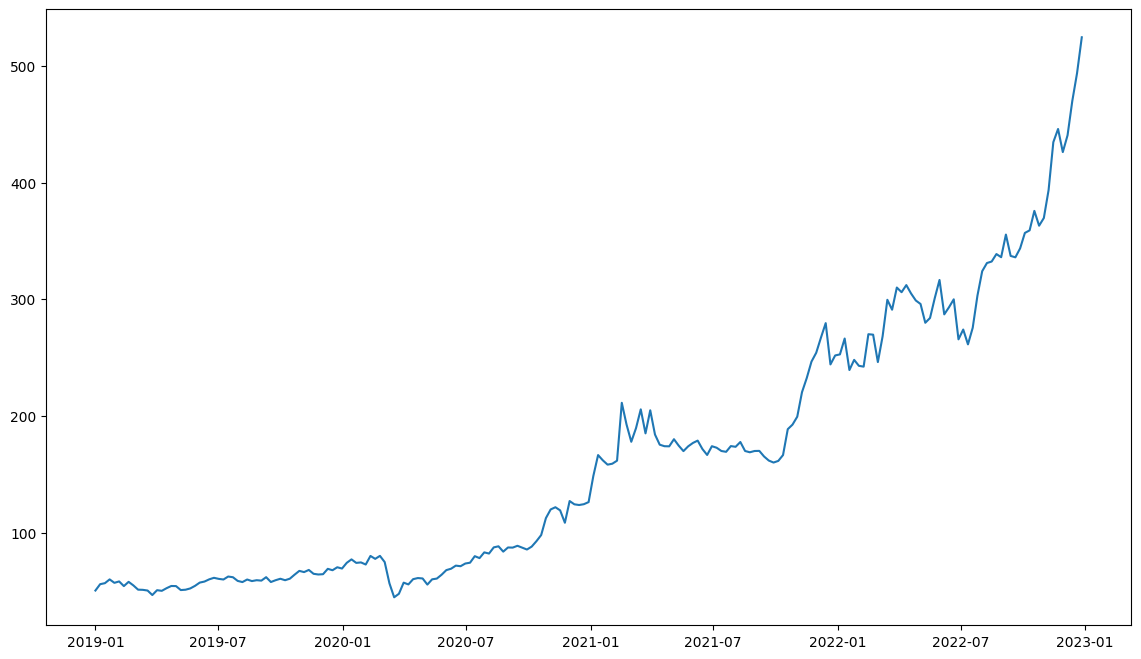

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(df['Close'])
plt.show

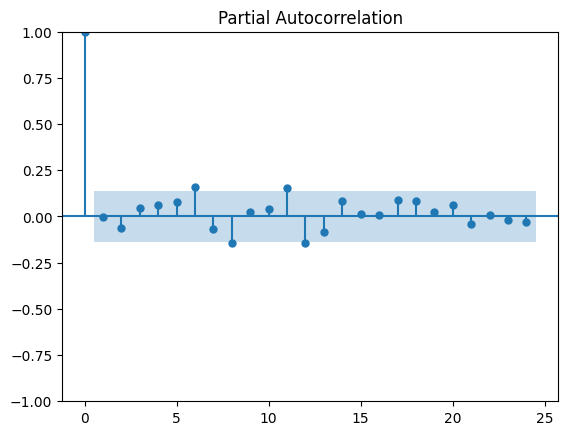

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].diff().dropna());

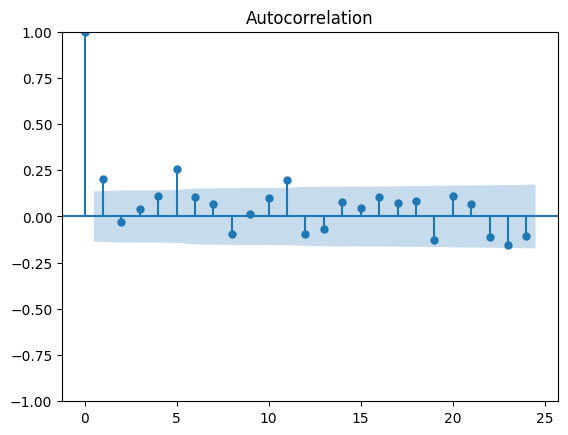

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'].diff().dropna());

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = df[df.index < '2023-01-01']

model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 26))

results = model.fit()

start_index = len(train)
end_index = start_index + 25
forecast = results.predict(start=start_index, end=end_index, dynamic=True)

print(forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)


2023-01-03    528.510548
2023-01-10    536.436396
2023-01-17    523.545912
2023-01-24    529.298869
2023-01-31    527.387753
2023-02-07    529.239650
2023-02-14    546.511451
2023-02-21    543.629235
2023-02-28    531.124699
2023-03-07    542.735329
2023-03-14    557.015532
2023-03-21    549.578323
2023-03-28    560.983501
2023-04-04    557.287801
2023-04-11    560.792811
2023-04-18    563.688865
2023-04-25    562.549399
2023-05-02    564.039689
2023-05-09    562.082211
2023-05-16    567.279788
2023-05-23    578.813639
2023-05-30    589.019424
2023-06-06    579.280344
2023-06-13    585.080468
2023-06-20    579.773925
2023-06-27    567.940243
Freq: W-TUE, Name: predicted_mean, dtype: float64


In [ ]:
gerçekdeğerler = pd.read_csv('ford6ayhaftalık.csv')
gerçekdeğerler['Date'] = pd.to_datetime(gerçekdeğerler['Date'])


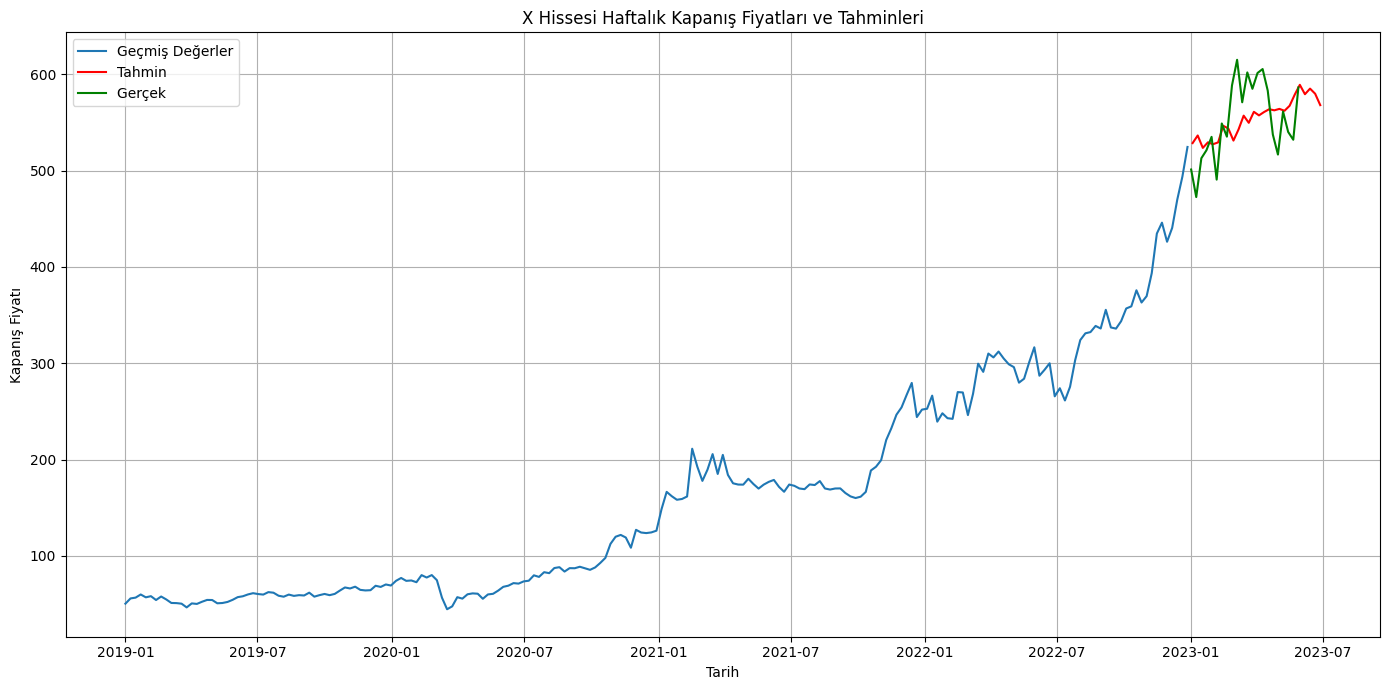

In [ ]:

plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label="Geçmiş Değerler")
plt.plot(forecast, label="Tahmin", color="red")
plt.plot(gerçekdeğerler['Date'], gerçekdeğerler['Close'], label="Gerçek ", color="green")
plt.title("X Hissesi Haftalık Kapanış Fiyatları ve Tahminleri")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()